# Set Initial Data from ADM Variables

In [1]:
Needs["xAct`xCoba`", FileNameJoin[{Environment["GENERATO"], "src/Generato.wl"}]]

------------------------------------------------------------
Package xAct`xPerm`  version 1.2.3, {2015, 8, 23}
CopyRight (C) 2003-2020, Jose M. Martin-Garcia, under the General Public\
 
>   License.
Connecting to external mac executable...
Connection established.
------------------------------------------------------------
Package xAct`xTensor`  version 1.2.0, {2021, 10, 17}
CopyRight (C) 2002-2021, Jose M. Martin-Garcia, under the General Public\
 
>   License.
------------------------------------------------------------
These packages come with ABSOLUTELY NO WARRANTY; for details type\
 
>   Disclaimer[]. This is free software, and you are welcome to redistribute\
 
>   it under certain conditions. See the General Public License for details.
------------------------------------------------------------
------------------------------------------------------------
Package xAct`xCoba`  version 0.8.6, {2021, 2, 28}
CopyRight (C) 2005-2021, David Yllanes and Jose M. Martin-Garcia, under t

In [2]:
DefManifold[M4, 4, IndexRange[a, z]];

In [3]:
<<"wl/cGHG_vars_check.wl";
<<"wl/ADM_vars_check.wl";
<<"wl/dtADM_vars_check.wl"
<<"wl/cGHGinADM_rhs.wl";
<<"wl/dtADM_rhs.wl"

In [8]:
rhsof[var_] := Module[{}, var /. {var[[0]] :> RHSOf[ToString[var[[0]]]]}];
eqssof[varlist_] := Module[{var}, 
   Table[var = varlist[[ivar]][[1]]; var == rhsof[var]//ScreenDollarIndices, {ivar, 1, Length[varlist]}]];

## Input

$$
\begin{align*}
&{\alpha, \beta^i, \gamma_{ij}, K_{ij},}\\
&{\partial_t\alpha, \partial_t\beta^i, \partial_t\gamma_{ij}.}\\
&{\partial_k\alpha, \partial_k\beta^i, \partial_k\gamma_{ij}.}
\end{align*}
$$

$$
\begin{align*}
{\partial_k\hat{H}_\mathbf{n}, \partial_k\hat{H}_l}
\end{align*}
$$

## Set $\partial_t\alpha, \partial_t\beta^i, \partial_t\gamma_{ij}$

### $\partial_t\gamma_{ij}$

$$
\begin{align*}
\partial_t\gamma_{ij}
&=-2\alpha K_{ij}+2D_{(i}\beta_{j)}\\
&=-2\alpha K_{ij}+2\partial_{(i}g_{j)0}-\beta^k\left(2\partial_{(i}g_{j)k}-\partial_kg_{ij}\right),
\end{align*}
$$

-Image-
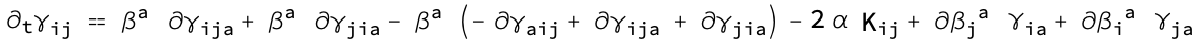

In [10]:
Rasterize[eqssof[ADMdtEvolVarlist][[3]]//MatrixForm]

### $\partial_t\alpha,\partial_t\beta^i$

$$
\begin{align*}
{}^{(3)}\hat\Gamma^i
&=\gamma^{1/3}
\left(
    \gamma^{ik}\gamma^{jl}-\frac{1}{3}\gamma^{ij}\gamma^{kl}
\right)\partial_j\gamma_{kl}
\\
{\partial_t\alpha}
&=\beta^k\partial_k\alpha - 2\alpha K,
\\
{\partial_t\beta^i}
&=\beta^k\partial_k\beta^i+\nu^{(3)}\hat\Gamma^i-\eta\beta^i.
\end{align*}
$$

-Image-
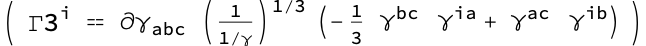

In [11]:
Rasterize[eqssof[GaugePunctureTempVarlist]//MatrixForm]

-Image-
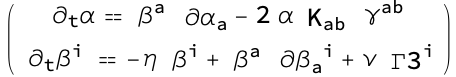

In [12]:
Rasterize[eqssof[ADMdtEvolVarlist][[1;;2]]//MatrixForm]

## Intermediate

$$
\begin{align*}
\gamma
&=\det\left(\gamma_{ij}\right),
\gamma^{ij}
=\left(\gamma_{ij}\right)^{-1},
K
=\gamma^{ij}K_{ij},
n^c
=\left(\alpha^{-1},-\alpha^{-1}\beta^i\right)
\end{align*}
$$

-Image-
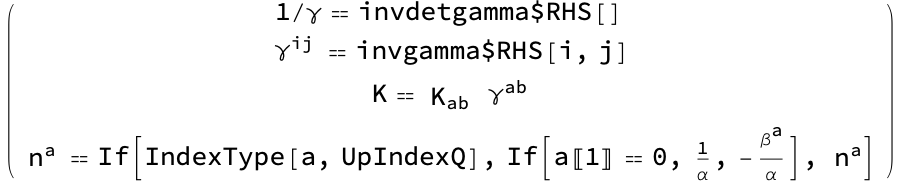

In [13]:
Rasterize[eqssof[ADMTempVarlist][[1;;4]]//MatrixForm]

### Set $\partial_cg_{ab}$

$$
\begin{align*}
\partial_cg_{ij}
&=\partial_c\gamma_{ij},
\\
\partial_cg_{0j}
&=\beta^l\partial_c\gamma_{jl}+\gamma_{jl}\partial_c\beta^l,
\\
\partial_cg_{00}
&=-2\alpha\partial_c\alpha+2\beta_l\partial_c\beta^l+\beta^i\beta^j\partial_c\gamma_{ij},
%\\
%\partial_tg_{ij}
%&
%=\partial_t\gamma_{ij}
%\\
%\partial_tg_{0j}
%&=\beta^k\partial_tg_{jk}+\gamma_{jk}\textcolor{red}{\partial_t\beta^k},
%\\
%\partial_tg_{00}
%&=-2\alpha\textcolor{red}{\partial_t\alpha}
%+2\beta_l\textcolor{red}{\partial_t\beta^l}+\beta^i\beta^j\partial_tg_{ij},
\end{align*}
$$

-Image-
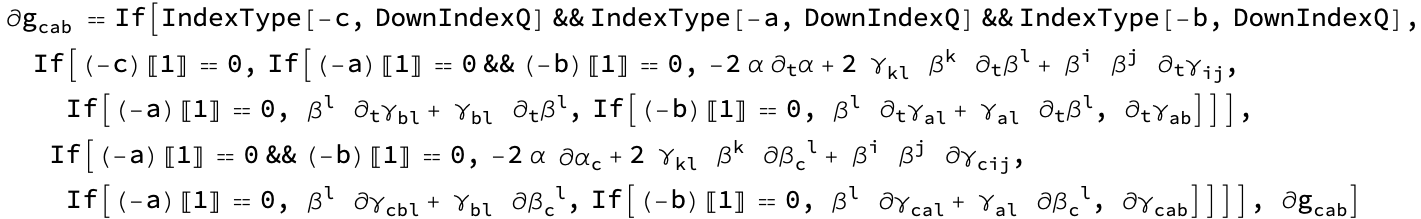

In [14]:
Rasterize[eqssof[ADMTempVarlist][[5]]//MatrixForm]

### Set $g^{ab}, \Gamma_{cab}, \Gamma_c$

-Image-
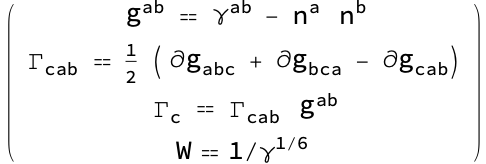

In [15]:
Rasterize[eqssof[ADMTempVarlist][[6;;-1]]//MatrixForm]

## Set cGHG Variables

-Image-
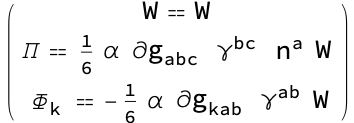

In [16]:
Rasterize[eqssof[cGHGEvolVarlist][[10;;12]]//MatrixForm]

-Image-
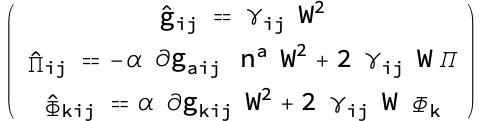

In [17]:
Rasterize[eqssof[cGHGEvolVarlist][[1;;3]]//MatrixForm]

-Image-
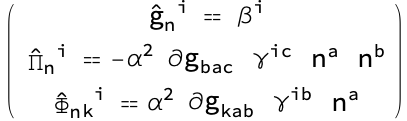

In [18]:
Rasterize[eqssof[cGHGEvolVarlist][[4;;6]]//MatrixForm]

-Image-
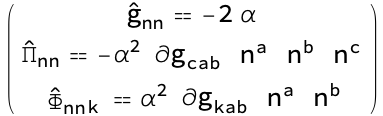

In [19]:
Rasterize[eqssof[cGHGEvolVarlist][[7;;9]]//MatrixForm]

-Image-
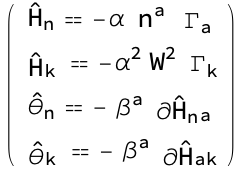

In [20]:
Rasterize[eqssof[cGHGEvolVarlist][[13;;16]]//MatrixForm]